# Can I predict the rating of a movie ?
#### Svetozar Mateev

I have a dataset with 5000+ movies scraped from IMDB and i hope that with the given attributes I will be able to predict the ratings.

Firts of all I am going to start with the imports. I am going to neeed both data science and machine learning libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder


from sklearn.linear_model import Lasso,Ridge,ElasticNet,BayesianRidge,ARDRegression,RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor


### Exploatory data analysis

#### Data cleaning

In [2]:
movie_data = pd.read_csv ("movie_metadata.csv")
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

These are my attributes.

In [3]:
columns = movie_data.columns
for col in columns:
    
    if movie_data['%s'% (col)].isnull().any()==True:
        print(col)
print(movie_data.color[movie_data.color.isnull()].shape) 
print(movie_data.director_name[movie_data.director_name.isnull()].shape) 
print(movie_data.num_critic_for_reviews[movie_data.num_critic_for_reviews.isnull()].shape )  #fill NaN here
print(movie_data.duration[movie_data.duration.isnull()].shape)  # fill NaN here
print(movie_data.director_facebook_likes[movie_data.director_facebook_likes.isnull()].shape)   # fill NaN here
print(movie_data.actor_3_facebook_likes[movie_data.actor_3_facebook_likes.isnull()].shape )  # fill NaN here
print(movie_data.actor_2_name[movie_data.actor_2_name.isnull()].shape)   
print(movie_data.actor_1_facebook_likes[movie_data.actor_1_facebook_likes.isnull()].shape )  # fill NaN here
print(movie_data.gross[movie_data.gross.isnull()].shape)   # fill Nan here
print(movie_data.actor_1_name[movie_data.actor_1_name.isnull()].shape  ) 
print(movie_data.actor_3_name[movie_data.actor_3_name.isnull()].shape )  
print(movie_data.facenumber_in_poster[movie_data.facenumber_in_poster.isnull()].shape   )# fill NaN here
print(movie_data.plot_keywords[movie_data.plot_keywords.isnull()].shape  ) 
print(movie_data.num_user_for_reviews[movie_data.num_user_for_reviews.isnull()].shape   )# fill NaN here
print(movie_data.language[movie_data.language.isnull()].shape   )
print(movie_data.country[movie_data.country.isnull()].shape) 
print(movie_data.content_rating[movie_data.content_rating.isnull()].shape)  
print(movie_data.budget[movie_data.budget.isnull()].shape) # fill NaN here  
print(movie_data.title_year[movie_data.title_year.isnull()].shape) 
print(movie_data.actor_2_facebook_likes[movie_data.actor_2_facebook_likes.isnull()].shape)  
print(movie_data.aspect_ratio[movie_data.aspect_ratio.isnull()].shape)# fill Nan here



color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
actor_1_name
actor_3_name
facenumber_in_poster
plot_keywords
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
aspect_ratio
(19,)
(104,)
(50,)
(15,)
(104,)
(23,)
(13,)
(7,)
(884,)
(7,)
(23,)
(13,)
(153,)
(21,)
(12,)
(5,)
(303,)
(492,)
(108,)
(13,)
(329,)


After I checked for Nan's it turned out that there aren't that many. Nevertheless I am going to fill most of them with their mean value.

In [4]:
movie_data.num_critic_for_reviews=movie_data.num_critic_for_reviews.fillna(movie_data.num_critic_for_reviews.mean())
movie_data.duration = movie_data.duration.fillna(movie_data.duration.mean())
real_director_likes= movie_data.director_facebook_likes[movie_data.director_facebook_likes!=0]
real_director_likes = real_director_likes.dropna()
movie_data.director_facebook_likes=movie_data.director_facebook_likes.fillna(real_director_likes.mean())

movie_data.actor_3_facebook_likes= movie_data.actor_3_facebook_likes.fillna(movie_data.actor_3_facebook_likes.mean())

gross_real_values= movie_data.gross[movie_data.gross !=0]
gross_real_values= gross_real_values.dropna()
movie_data.gross= movie_data.gross.fillna(gross_real_values.mean())

movie_data.gross = movie_data.gross/1000000
movie_data.facenumber_in_poster= movie_data.facenumber_in_poster.fillna(movie_data.facenumber_in_poster.mean())
movie_data.num_user_for_reviews= movie_data.num_user_for_reviews.fillna(movie_data.num_user_for_reviews.mean())
movie_data.budget= movie_data.budget.fillna(movie_data.budget.mean())
movie_data.budget= movie_data.budget/1000000
movie_data.aspect_ratio= movie_data.aspect_ratio.fillna(movie_data.aspect_ratio.mean())
movie_data=movie_data.dropna().reset_index(drop=True)


Some columns had an unusual amount of 0's so I read in the documentation that this was a web scraper bug so I did't use them for the filling.

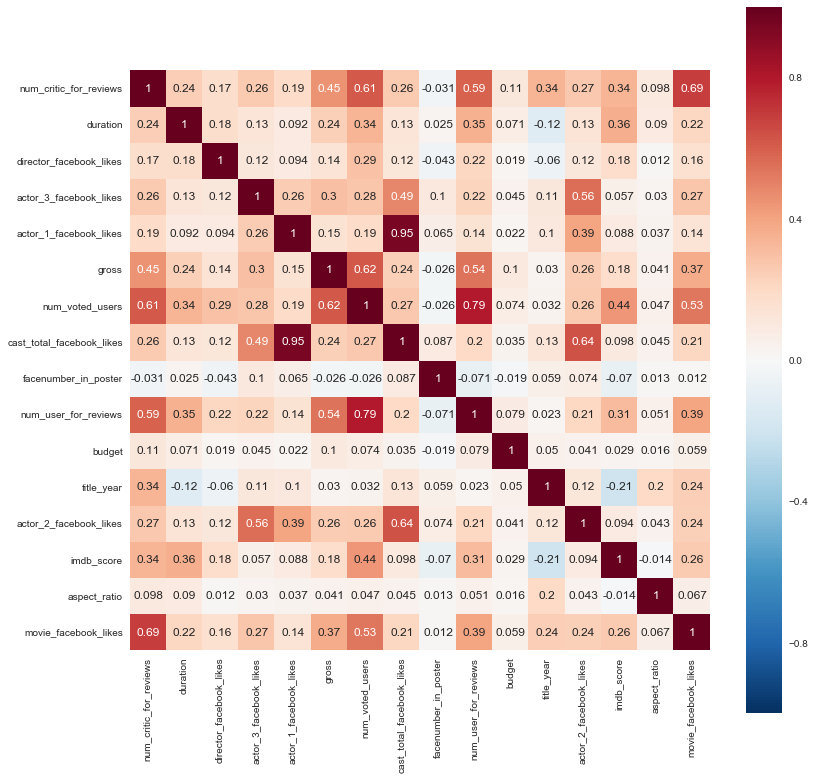

In [5]:
plt.figure(figsize=(13,13))
basic_matrix=movie_data.corr()
sns.heatmap(basic_matrix, square=True,annot=True)
plt.show()

Here is a correlation matrix of all numerical variables. I am using it so I can see the data better and because of the strong correlation between the facebook likes of the first actor and the number of critics for reviews I am going to drop the one of them.

In [6]:
movie_data = movie_data.drop(['actor_1_facebook_likes'],axis=1)
movie_data = movie_data.drop(['movie_imdb_link'], axis=1)
movie_data.shape

(4581, 26)

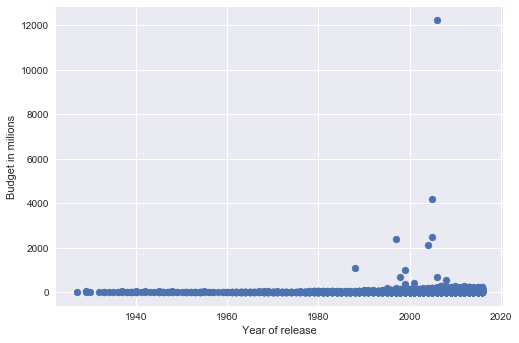

987     The Messenger: The Story of Joan of Arc 
1300                                  Red Cliff 
2246                          Princess Mononoke 
2257                                   Steamboy 
2880                                   The Host 
2897                                   Fateless 
2962                     Kabhi Alvida Naa Kehna 
3178                   The Legend of Suriyothai 
3278                                      Akira 
3657                                      Tango 
3665                             Lady Vengeance 
4231                              Godzilla 2000 
Name: movie_title, dtype: object


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
plt.scatter(movie_data.title_year,movie_data.budget)
plt.xlabel("Year of release")
plt.ylabel("Budget in milions")
plt.show()
odd_movies= movie_data[movie_data.budget>380]
print(odd_movies.movie_title)


movie_data.budget.loc[movie_data.budget==390.000000]=85
movie_data.budget.loc[movie_data.budget==553.632000]=36
movie_data.budget.loc[movie_data.budget==2400.000000]=23.5
movie_data.budget.loc[movie_data.budget==2127.519898]=22
movie_data.budget.loc[movie_data.budget==12215.500000]=40
movie_data.budget.loc[movie_data.budget==2500.000000]=8.5
movie_data.budget.loc[movie_data.budget==700.000000]=7.4
movie_data.budget.loc[movie_data.budget==400.000000]=10.1
movie_data.budget.loc[movie_data.budget==1100.000000]=8
movie_data.budget.loc[movie_data.budget== 700.000000]=4.206
movie_data.budget.loc[movie_data.budget== 4200.000000]=4.5
movie_data.budget.loc[movie_data.budget==1000.000000]=8.3





Here I am looking at how the budjet of a film is variating with time.However I googled the record budget for a movie and it was 380 000 000 not 1.2 billion dollars. So i fixed them with the help of Google and the plot below is the accurate one.

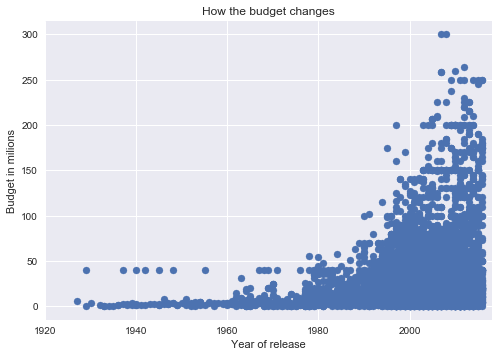

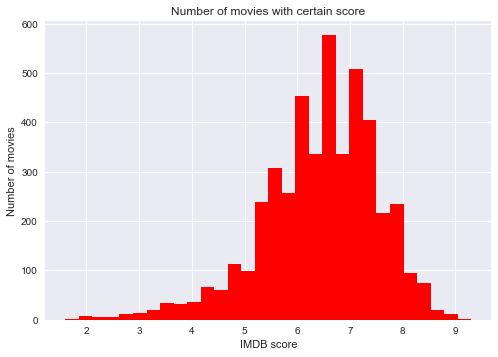

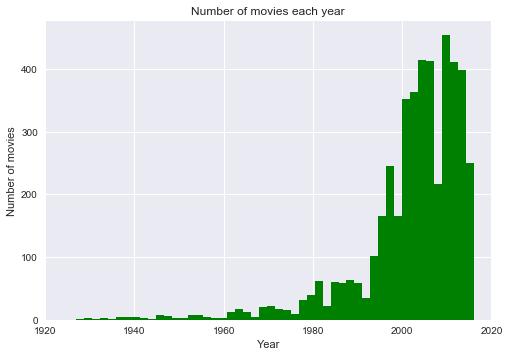

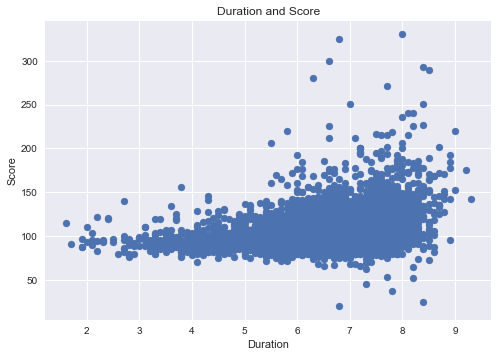

In [8]:
plt.scatter(movie_data.title_year,movie_data.budget)
plt.xlim(1920,2018)
plt.title("How the budget changes")
plt.xlabel("Year of release")
plt.ylabel("Budget in milions")
plt.show()

plt.hist(movie_data.imdb_score,bins=30,color='r')
plt.title("Number of movies with certain score")
plt.xlabel("IMDB score")
plt.ylabel("Number of movies")
plt.show()

plt.hist(movie_data.title_year, bins= 50,color='g')
plt.xlim(1920,2020)
plt.xlabel("Year")
plt.title("Number of movies each year")
plt.ylabel("Number of movies")
plt.show()

plt.scatter(movie_data.imdb_score,movie_data.duration)

plt.title("Duration and Score")
plt.xlabel("Duration")
plt.ylabel("Score")
plt.show()

From the plot I can see something very bad. There are very few movies with rating above 9 and below let's say 4 in comparison with those with ratings 5,6,7,8.

More bad news. The movies before 1980 are very few in number compared to those after.

I am going to create a method to help me with the plotting.

In [9]:
def plotting_from_high_to_low(parameter,xlabel,ylabel):
    group_country = movie_data.groupby(by=parameter,as_index=False)
    number_per_country=group_country.size()
    country_to_count ={}

    names=[]
    for g in group_country:
        names.append(g[0])


    counter=0
    for o in number_per_country:
        country_to_count[names[counter]]=o
        counter+=1
    v_counter=0
    values=[]
    for z in sorted(country_to_count.values(),reverse=True):
        values.append(z)
        if v_counter>8:
            break
        v_counter+=1
    n_counter=0
    name=[]
    for y in sorted(country_to_count, key=country_to_count.__getitem__,reverse=True):
        name.append(y)
        if n_counter>8:
            break
        n_counter+=1

    plt.bar(left=range(10),height=values,align='center')
    plt.xticks(range(10),name,rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

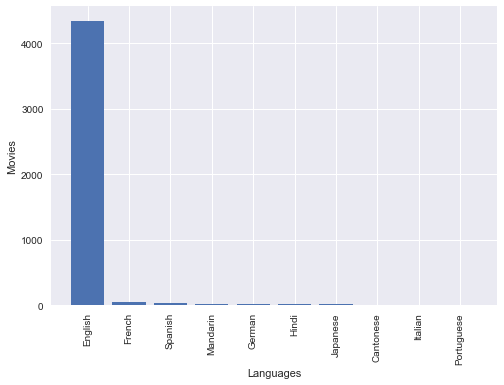

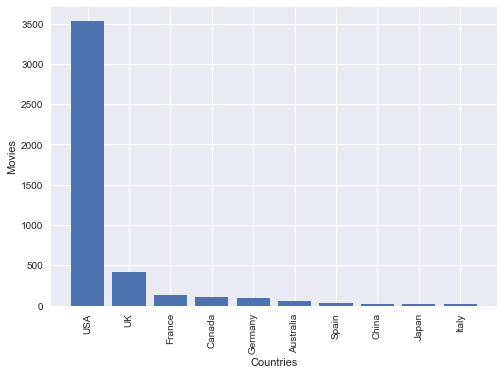

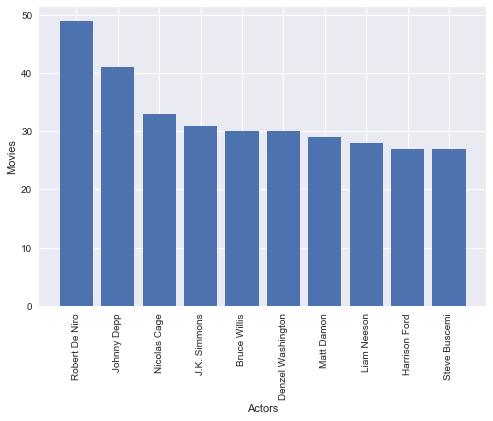

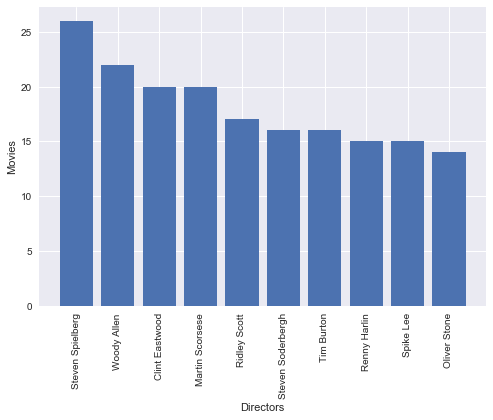

In [10]:
plotting_from_high_to_low('language','Languages','Movies')
plotting_from_high_to_low('country','Countries','Movies')
plotting_from_high_to_low('actor_1_name','Actors','Movies')
plotting_from_high_to_low('director_name','Directors','Movies')

Clearly the main movie language is English which is logical but is very bad for model training.

In [11]:

#group_country = movie_data.groupby(by='country',as_index=False)
#number_per_country=group_country.size()
#country_to_count ={}
#
#names=[]
#for g in group_country:
#    names.append(g[0])
#
#
#counter=0
#for o in number_per_country:
#    country_to_count[names[counter]]=o
#    counter+=1
#v_counter=0
#values=[]
#for z in sorted(country_to_count.values(),reverse=True):
#    values.append(z)
#    if v_counter>8:
#        break
#    v_counter+=1
#n_counter=0
#name=[]
#for y in sorted(country_to_count, key=country_to_count.__getitem__,reverse=True):
#    name.append(y)
#    if n_counter>8:
#        break
#    n_counter+=1
#
#plt.bar(left=range(10),height=values,align='center')
#plt.xticks(range(10),name,rotation=90)
#plt.show()


And in terms of directors Steven Spilberg is leading in terms of movies made.The actor Robert De Niro has the most movies as the main actor.However Johnny Depp isn't too far behind.From the diagram I can confidentrly say that the USA are the leader in film making according to my data.

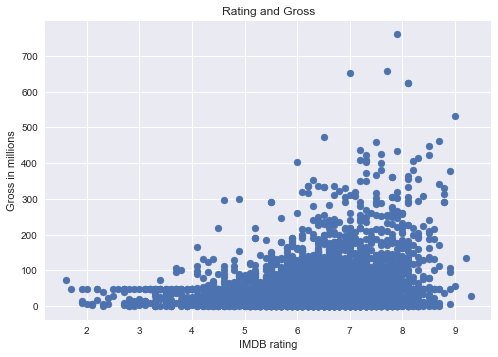

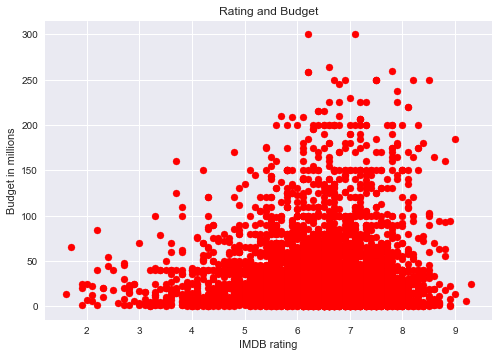

In [12]:
plt.title("Rating and Gross")
plt.scatter(movie_data.imdb_score, movie_data.gross)
plt.xlabel("IMDB rating")
plt.ylabel("Gross in millions")
plt.show()
plt.title("Rating and Budget")
plt.scatter(movie_data.imdb_score,movie_data.budget,color='r')
plt.xlabel("IMDB rating")
plt.ylabel("Budget in millions")
plt.show()


From the plots I can see that the rating of a movie clearly isn't connected neither to the budget nor to the gross.

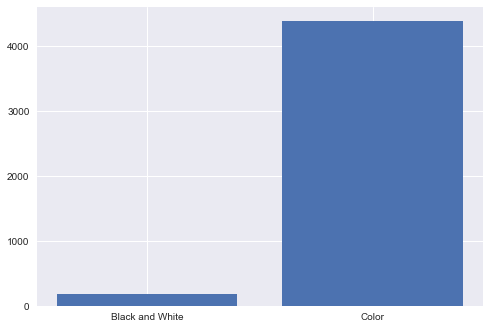

4.1257367387%
95.8742632613%


In [13]:
color_group = movie_data.groupby(by='color')
occurences=color_group.size()
plt.bar(left=[0,1], height = occurences,align='center')
plt.xticks([0,1],["Black and White","Color"] )
plt.show()
for o in occurences:
    print(str(o/len(movie_data)*100)+'%')

In [14]:
movie_data.genres
all_genres=set()

for m in movie_data.genres.unique():
    list_genres=m.split('|')
    for i in list_genres:
        all_genres.add(i)
    
    


new_col=pd.DataFrame(columns=all_genres,index=range(len(movie_data)))
for c in range(len(new_col)):
    this_movie_genres=movie_data.iloc[c].genres.split("|")
    for col in new_col.columns:
        if col in this_movie_genres:
            new_col.iloc[c][col]=1
        else:
            new_col.iloc[c][col]=0

movie_data=pd.concat([movie_data,new_col],axis=1)


In [15]:
movie_data=movie_data.drop('genres',axis=1)

In [16]:
movie_data.shape

(4581, 48)

As I expected only 4.12% of the movies are black and white and almost all have color.

In [17]:
movie_data.language=LabelEncoder().fit_transform(movie_data.language)
#print(movie_data.language)
movie_data.country=LabelEncoder().fit_transform(movie_data.country)
#print(movie_data.country)
movie_data.director_name=LabelEncoder().fit_transform(movie_data.director_name)
#print(movie_data.director_name)
movie_data.actor_1_name=LabelEncoder().fit_transform(movie_data.actor_1_name)
#print(movie_data.actor_1_name)

### Model testing 

In [18]:
#'color', 'director_name', 'num_critic_for_reviews', 'duration',
#       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
#       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
#       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
#       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
#       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
#       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
#       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'
workable_data = movie_data.drop(["content_rating","movie_title","director_name",
                                 "actor_1_name","actor_2_name","plot_keywords","actor_3_name"], axis=1)
scaler=StandardScaler()
attributes = scaler.fit_transform(pd.get_dummies(workable_data.drop('imdb_score',axis=1)),workable_data['imdb_score'])
labels = workable_data['imdb_score']
attr_train,attr_test,l_train,l_test = train_test_split(attributes,labels, train_size=0.7)


After I have processed the data in a way in which it is scaled, easy to fit and train and I have dropped some of the columns which can't be used or are not appropriate to use. I am going to try different models.
First the method is doing a grid search to find the best parameters then it is cross validating twice- the first time for the r2 score and the second time for the negative mean squared error.I am going to evaluate the model's performance with a negative mean squared error and r2 score. My main concern is that the models will be very unstable because of the data.

In [19]:
parameters={"fit_intercept":[True,False],"normalize":[True,False]}
score_model = LinearRegression()
grid=GridSearchCV(score_model,parameters)
grid.fit(attr_train,l_train)
print(grid.best_params_)
print(grid.best_score_)

{'fit_intercept': False, 'normalize': True}
-231221.790909


In [20]:
def best_params(model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels):
    grid=GridSearchCV(model,parameters)
    grid.fit(attr_train,l_train)
    kfold= StratifiedKFold(n_splits=5, shuffle = True)
    folds = kfold.get_n_splits(attr_train,l_train)
    cross= cross_val_score(model,attributes,labels,cv=folds,scoring='r2')
    cross2= cross_val_score(model,attributes,labels,cv=folds,scoring='neg_mean_squared_error')

    print(grid.best_params_)
    print('Grid Score',grid.best_score_)
    print('R2 score',cross)
    print('Negative mean squared error',cross2)
 
    

In [21]:
score_model=LinearRegression(n_jobs=16)
score_model.fit(attr_train,l_train)
cross= cross_val_score(score_model,attributes,labels,cv=3,scoring='r2')
cross

array([  4.90394668e-01,  -3.02635326e+23,  -2.21924909e+25])

In [22]:
lasso_model = Lasso()
parameters={"alpha": [0.9,0.81,1.1,1.2]}
best_params(lasso_model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'alpha': 0.9}
Grid Score -0.00133407700625
R2 score [-0.00432857 -0.00602907 -0.01575349 -0.003927   -0.00557895]
Negative mean squared error [-0.9992169  -0.996503   -1.39344431 -1.1742522  -1.48718679]


In [23]:
ridge_model = Ridge()
parameters={"alpha": [6,7,8,9,10,12,13]}
best_params(ridge_model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)


{'alpha': 13}
Grid Score 0.484349226302
R2 score [ 0.49991597  0.51305171  0.47027708  0.4451263   0.44800024]
Negative mean squared error [-0.49753879 -0.48233738 -0.72669146 -0.64901299 -0.81637226]


In [24]:
elastic_model=ElasticNet()
parameters={"alpha": [2,5,3,4,6,7,8],"l1_ratio":[0.1,0.2,0.3,0.4,0.5]}
best_params(elastic_model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'alpha': 2, 'l1_ratio': 0.1}
Grid Score 0.155036448783
R2 score [-0.00432857 -0.00439645 -0.01575349  0.00491515  0.00362176]
Negative mean squared error [-0.9992169  -0.99488583 -1.39344431 -1.1639099  -1.47357954]


In [25]:
ransac=RANSACRegressor()
params={}
best_params(ransac,params,attr_train,l_train,attr_test,l_test,attributes,labels)

{}
Grid Score -8.69902234519e+24
R2 score [ -1.77674089e+00   3.35525112e-01  -1.32372649e+23   3.28800422e-01
  -8.00090335e+21]
Negative mean squared error [ -1.07373000e+00  -7.82904944e-01  -7.80884137e+23  -7.23374588e-01
  -1.14627957e+21]


In [26]:
tree= DecisionTreeRegressor()
parameters={"criterion": ['mse','mae'],"max_depth":[None,1,2,3,5,6]}
best_params(tree,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'criterion': 'mse', 'max_depth': 5}
Grid Score 0.413106631579
R2 score [ 0.18839924  0.11858622  0.14584537  0.03369175  0.00591662]
Negative mean squared error [-0.83250818 -0.84603712 -1.20223799 -1.14139738 -1.61687773]


In [27]:
forest = RandomForestRegressor(n_jobs=-1)
parameters={"n_estimators":[1000,500,2000],"max_depth":[1,10,50,30]}
best_params(forest,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'max_depth': 30, 'n_estimators': 2000}
Grid Score 0.587825924477
R2 score [ 0.55902309  0.56289479  0.51912048  0.4637476   0.35531202]
Negative mean squared error [-0.4665506  -0.41846921 -0.66555218 -0.61602969 -0.89752533]


In [28]:
adaboost = AdaBoostRegressor()
parameters={ 'n_estimators' :[200, 100, 50,25], 'learning_rate':[0.5, 0.1,1]}
best_params(adaboost,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'learning_rate': 0.1, 'n_estimators': 100}
Grid Score 0.378198519836
R2 score [ 0.39574995  0.43678887  0.39522588  0.13142884  0.02594557]
Negative mean squared error [-0.63378855 -0.56933588 -0.81951939 -0.96463299 -1.47133965]


In [29]:
br=BayesianRidge()
params={'n_iter':[100,200],'tol':[0.001,0.01,1,10],'alpha_1':[1e-06,1e-05,1e-04],
        'alpha_2':[10,100,1],
        'lambda_1':[1e-08,1e-06,1e-07], 
        'lambda_2':[1e-08,1e-06,1e-07],
        'fit_intercept':[True,False],'normalize':[True,False]}
best_params(br,params,attr_train,l_train,attr_test,l_test,attributes,labels)

{'alpha_1': 0.0001, 'alpha_2': 1, 'fit_intercept': True, 'lambda_1': 1e-08, 'lambda_2': 1e-06, 'n_iter': 100, 'normalize': False, 'tol': 1}
Grid Score 0.484327680094
R2 score [ 0.50357137  0.51331891  0.4692057   0.44455227  0.44783523]
Negative mean squared error [-0.49390199 -0.48207272 -0.72816123 -0.64968441 -0.8166163 ]


In [30]:
nn=MLPRegressor()
params={"hidden_layer_sizes":[(10,10,10,10,10),(100,100,100),(500,500),(66,66,66),(50,60,70,20)]}
search = GridSearchCV(nn,params,n_jobs=-1)
search.fit(attr_train,l_train)
print(search.best_estimator_)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [31]:
print(search.score(attr_test,l_test))
print(search.score(attr_train,l_train))

0.427174550314
0.50513344127


In [32]:
nn1=MLPRegressor(hidden_layer_sizes=(10,10,10,10,10))
print(cross_val_score(nn1,attributes,labels,n_jobs=-1,scoring='r2'))
print(cross_val_score(nn1,attributes,labels,n_jobs=-1,scoring='neg_mean_squared_error'))

[ 0.19468168  0.43023806  0.38774852]
[-0.75918853 -0.65862639 -1.1277742 ]


After testing many models I can see that the Ridge regression, the Random Forest,AdaBoost,Bayesian Ridge and the Support Vector Machines are giving me useful results and I would say that the support vector machines are the best model to use because they are the most stable one depsite still having a difference of 8.5% between the lowest and the highest result.

After I plotted some error plots I can say I am not very happy with the results so I am going to try to implement inflation and a few other tricks.

In [33]:
inflation = pd.read_excel('inflation.xlsx')
inflation=inflation.drop([0,1,2,3,4,5,6,7,8,9])
inflation.columns=['year','jan','feb','mar','apr','may','june','jule','aug','sep','oct','nov','dec','half1','half2']
inflation.jan=inflation.jan.astype(float)
inflation.feb=inflation.feb.astype(float)
inflation.mar=inflation.mar.astype(float)
inflation.apr=inflation.apr.astype(float)
inflation.may=inflation.may.astype(float)
inflation.june=inflation.june.astype(float)
inflation.jule=inflation.jule.astype(float)
inflation.aug=inflation.aug.astype(float)
inflation.sep=inflation.sep.astype(float)
inflation['oct']=inflation['oct'].astype(float)
inflation.nov=inflation.nov.astype(float)
inflation.dec=inflation.dec.astype(float)
inflation=inflation.drop(['half1','half2'],axis=1)

inflation['mean']=(inflation.jan+
inflation.feb+inflation.mar
+inflation.apr+inflation.may+inflation.june
+inflation.jule+inflation.aug+inflation.sep+inflation['oct']+inflation.nov+inflation.dec)/12
inflation.reset_index(inplace=True,drop=True)
inflation.head()

,year,jan,feb,mar,apr,may,june,jule,aug,sep,oct,nov,dec,mean
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.883333
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.016667
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.108333
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.883333
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.825000


In [34]:

def calculateInflation(year_wanted,year_now,num):
    price_now=-1
    price_future=-1
    year_wanted_num = year_wanted-1913
    year_now_num = year_now-1913
    counter=0
    for i in inflation['mean']:    
        if counter==year_now_num:
            price_now=i
        if counter==year_wanted_num:
            price_future=i
        counter+=1
  
    year_wanted_num
    
    inflation_rate=(price_future-price_now)/price_now
 
    return(num*inflation_rate+num)
    


In [35]:
budgets=pd.DataFrame()
grosses=pd.DataFrame()
budgets['adj_budget']=movie_data.budget
grosses['adj_gross']=movie_data.gross

for i in range(len(movie_data)):
    budgets.iloc[i].adj_budget=calculateInflation(2016,movie_data.iloc[i].title_year,movie_data.iloc[i].budget)
    grosses.iloc[i].adj_gross=calculateInflation(2016,movie_data.iloc[i].title_year,movie_data.iloc[i].gross)
   
    

In [36]:
movie_data=pd.concat([movie_data,budgets],axis=1)
movie_data=pd.concat([movie_data,grosses],axis=1)
movie_data=movie_data.drop(['budget','gross'],axis=1)
movie_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_name,movie_title,num_voted_users,...,Sport,Biography,Documentary,Film-Noir,News,Music,Romance,Adventure,adj_budget,adj_gross
0,Color,807,723.000000,178.0,0.0,855.0,Joel David Moore,230,Avatar,886204,...,0,0,0,0,0,0,0,1,265.137009,850.794285
1,Color,697,302.000000,169.0,563.0,1000.0,Orlando Bloom,869,Pirates of the Caribbean: At World's End,471220,...,0,0,0,0,0,0,0,1,347.262037,358.147720
2,Color,1788,602.000000,148.0,0.0,161.0,Rory Kinnear,306,Spectre,275868,...,0,0,0,0,0,0,0,1,248.090879,202.598277
3,Color,332,813.000000,164.0,22000.0,23000.0,Christian Bale,1709,The Dark Knight Rises,1144337,...,0,0,0,0,0,0,0,0,261.338770,468.455642
4,Color,87,462.000000,132.0,475.0,530.0,Samantha Morton,388,John Carter,212204,...,0,0,0,0,0,0,0,1,275.660134,76.372261
5,Color,1791,392.000000,156.0,0.0,4000.0,James Franco,696,Spider-Man 3,383056,...,0,0,0,0,0,0,1,1,298.645352,389.547329
6,Color,1457,324.000000,100.0,15.0,284.0,Donna Murphy,186,Tangled,294810,...,0,0,0,0,0,0,1,1,286.174223,221.022547
7,Color,1076,635.000000,141.0,0.0,19000.0,Robert Downey Jr.,289,Avengers: Age of Ultron,462669,...,0,0,0,0,0,0,0,1,253.153958,464.782160
8,Color,476,375.000000,153.0,282.0,10000.0,Daniel Radcliffe,25,Harry Potter and the Half-Blood Prince,321795,...,0,0,0,0,0,0,0,1,279.680389,337.805783
9,Color,2108,673.000000,183.0,0.0,2000.0,Lauren Cohan,653,Batman v Superman: Dawn of Justice,371639,...,0,0,0,0,0,0,0,1,250.000000,330.249062


In [37]:
working_data =movie_data.drop(["content_rating","movie_title",
                                 "actor_1_name","actor_2_name","actor_1_name","plot_keywords","actor_3_name"], axis=1)
attributes=working_data.drop('imdb_score',axis=1)
scale=StandardScaler()

labels=working_data.imdb_score
attributes=scale.fit_transform(pd.get_dummies(attributes),labels)
attr_train,attr_test,l_train,l_test= train_test_split(attributes,labels,train_size=0.7)

scaled_attr_train=attr_train
scaled_attr_test=attr_test
scaled_attr= attributes
kfold= StratifiedKFold(n_splits=10, shuffle = True)
folds = kfold.get_n_splits(scaled_attr_train,l_train)

In [38]:
kfold= StratifiedKFold(n_splits=4, shuffle = True)
folds = kfold.get_n_splits(scaled_attr,labels)

### Ridge

In [39]:
ridge_scl=Ridge()
params={'alpha':[0.1,1,2,10],'normalize':[True,False],'fit_intercept':[True,False]}
grid=GridSearchCV(ridge_scl,params)
grid.fit(scaled_attr_train,l_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1, 2, 10], 'normalize': [True, False], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
ridge_scl1=Ridge()
print(cross_val_score(ridge_scl1,scaled_attr,labels,cv=folds,scoring='r2'))
print(cross_val_score(ridge_scl1,scaled_attr,labels,cv=folds,scoring='neg_mean_squared_error'))

[ 0.48929803  0.51137716  0.46038861  0.42457334]
[-0.50410503 -0.56584116 -0.66111052 -0.83114721]


In [41]:
ridge_scl1.fit(scaled_attr_train,l_train)
predicted=ridge_scl1.predict(scaled_attr_test)

-0.028165109464273266
2.29900071032


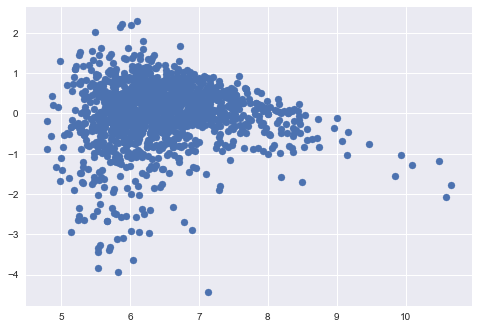

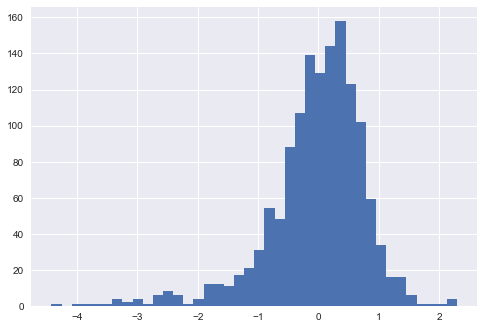

In [42]:
print((l_test-predicted).mean())
print((l_test-predicted).max())
plt.scatter(predicted,l_test-predicted)
plt.show()
plt.hist(l_test-predicted,bins=40)
plt.show()

I have prepared the training and testing samples which are stratified and scaled also inflation is a factor and I hope to achieve better results both with RandomForests and SVMs.

### Random Forest

In [43]:
forest = RandomForestRegressor(n_estimators=500, max_depth=10,n_jobs=-1)
print(cross_val_score(forest,scaled_attr,labels,cv=folds,n_jobs=-1,scoring='r2'))
print(cross_val_score(forest,scaled_attr,labels,cv=folds,n_jobs=-1,scoring='neg_mean_squared_error'))


[ 0.54557586  0.55006447  0.51174296  0.35691713]
[-0.44633545 -0.52211509 -0.59508888 -0.93258987]


In [44]:
forest.fit(scaled_attr_train,l_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [45]:
predicted=forest.predict(scaled_attr_test)
y=predicted-l_test
print(y.mean())

0.016204109956983372


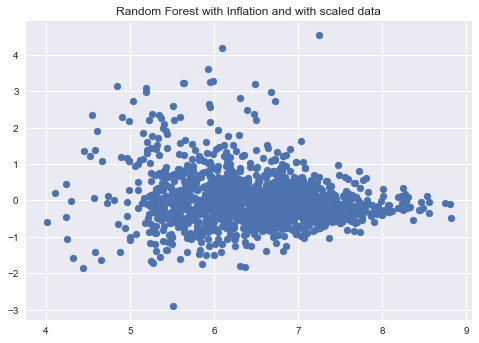

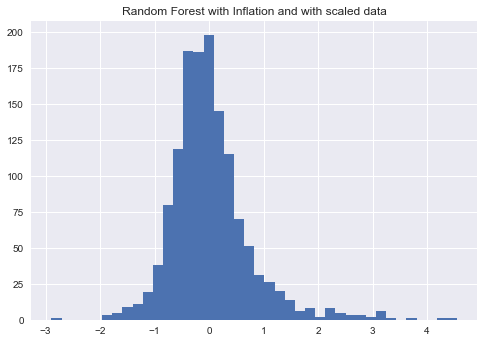

In [46]:
plt.scatter(predicted,y)
plt.title("Random Forest with Inflation and with scaled data")
plt.show()
plt.title("Random Forest with Inflation and with scaled data")
plt.hist(y,bins=40)
plt.show()

In [47]:
forest.score(scaled_attr_train,l_train)

0.80658501533128346

The results are actually slightly better. There is still some difference in the cross validation results but in comparison to the previous Random Forest they are smaller and the scores are higher.

### Neural network

In [48]:
nn1=MLPRegressor()
params={'hidden_layer_sizes':[(100,100,100),(100,),(30,30,30,30,30),(80,20,50,15,60),(30,30,30,30,30)]}
grid=GridSearchCV(nn1,params,n_jobs=-1)
grid.fit(scaled_attr_train,l_train)
print(grid.best_params_)

{'hidden_layer_sizes': (30, 30, 30, 30, 30)}


In [49]:
nn2=MLPRegressor(hidden_layer_sizes=(30, 30, 30, 30, 30))
cross_val_score(nn2,scaled_attr,labels,n_jobs=-1,cv=folds)

array([ 0.31874625,  0.4068736 ,  0.45096366,  0.07771877])

The model is very unstable and the scores are low so I am not going to examine it any further

[  5.60123358e+00   5.17018104e+00   4.20300474e+00   3.02037521e+00
   2.69782558e+00   2.65150215e+00   2.56410995e+00   2.37984594e+00
   2.22944390e+00   2.09279461e+00   2.00837681e+00   1.92906374e+00
   1.88082157e+00   1.75443203e+00   1.70556806e+00   1.63817476e+00
   1.56074207e+00   1.50317127e+00   1.49600244e+00   1.32296886e+00
   1.28868634e+00   1.18903831e+00   1.13196094e+00   1.07148554e+00
   9.93798729e-01   9.32887574e-01   9.25018290e-01   8.89711079e-01
   8.64795549e-01   8.22890538e-01   7.97333413e-01   7.48157968e-01
   6.88725384e-01   6.37713824e-01   5.76679691e-01   5.06590658e-01
   4.67587376e-01   3.46963781e-01   3.18098458e-01   2.33813552e-01
   1.58424703e-01   1.45160802e-30   8.34095960e-31   7.34521375e-31
   5.42986353e-31   4.84656629e-31   3.67022036e-31   3.06867784e-31
   2.05583902e-31   1.71406509e-31   1.37316718e-31   9.17574783e-32
   7.86048108e-32   7.28453812e-32   3.89965734e-32   2.64411800e-32
   2.64411800e-32   2.64411800e-32

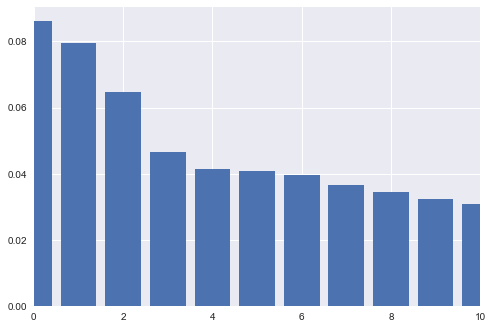

In [50]:
pca=PCA()
pca.fit(attributes)
print(pca.explained_variance_)
plt.bar(list(range(len(pca.components_))), pca.explained_variance_ratio_)
plt.xlim(0,10)
plt.show()

In [51]:
movie_data['net_income']=movie_data.adj_gross-movie_data.adj_budget

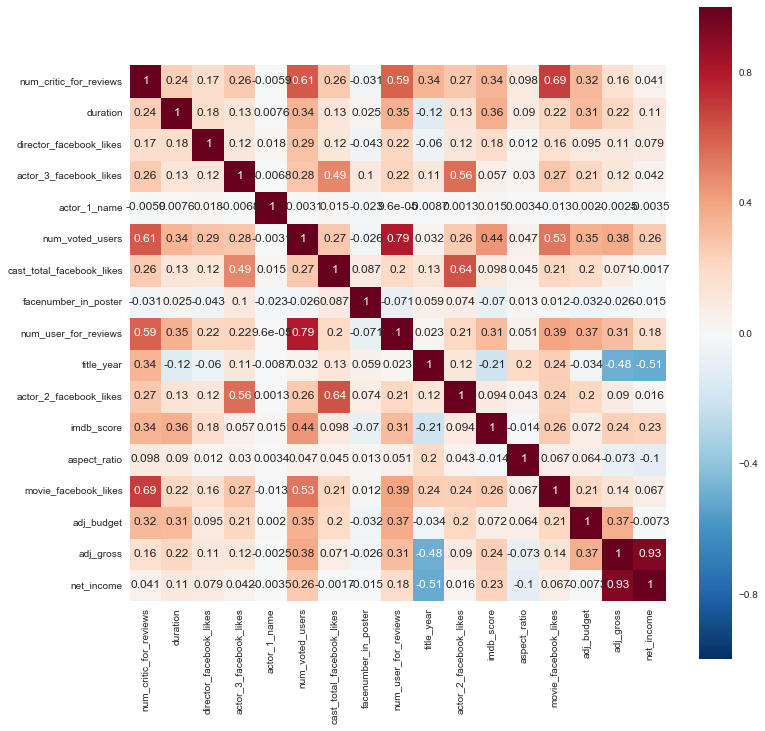

In [52]:
plt.figure(figsize=(12,12))
basic_matrix=movie_data.drop(['director_name','language','country'],axis=1).corr()
sns.heatmap(basic_matrix, square=True,annot=True)
plt.show()

In [53]:
movie_data.imdb_score= round(movie_data.imdb_score)
attributes = pd.get_dummies(movie_data.drop(["content_rating","movie_title","director_name",
                                 "actor_1_name","actor_2_name","actor_1_name",
                                          "plot_keywords","actor_3_name","imdb_score"], axis=1))
labels=movie_data.imdb_score
skf=StratifiedKFold(n_splits=5)
attr=skf.get_n_splits(attributes,labels)
attr_train,attr_test,l_train,l_test=train_test_split(attributes,labels,train_size=0.7,stratify=labels)

In [54]:
forest_classifier= RandomForestClassifier(n_jobs=-1)
params={"n_estimators":[10,100,1000],"max_depth":[1,10,20,50]}
grid=GridSearchCV(forest,params)
grid.fit(attr_train,l_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [1, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
forest_cl = RandomForestClassifier(n_jobs=-1,n_estimators=500, max_depth=10)
cross_val_score(forest_cl,attributes,labels,cv=attr,n_jobs=-1)

array([ 0.52774755,  0.56692057,  0.55398037,  0.54107338,  0.47645126])